Project 2 Question 1 Exploring World Happiness
First step is to import all modules and datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
sns.set()

happiness2015 = pd.read_csv("C:\Users\heid4253\Documents\Project2Data\World_Happiness_2015.csv")
happiness2016 = pd.read_csv("C:\Users\heid4253\Documents\Project2Data\World_Happiness_2016.csv")
happiness2017 = pd.read_csv("C:\Users\heid4253\Documents\Project2Data\World_Happiness_2017.csv")
happiness2017 = happiness2017.rename(columns={'Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)','Dystopia.Residual':'Dystopia Residual'})
happiness2017.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [2]:
happiness2016.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


I will drop all the happiness score and country/region variables from the three data sets so I am left with just the variable scores.

In [3]:
happiness2015.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [47]:
hap2015 = happiness2015.drop(columns=['Country','Region','Happiness Rank','Happiness Score','Standard Error'])
hap2015.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [48]:
hap2017 = happiness2017.drop(columns=['Country','Happiness Rank','Happiness Score','Whisker.high','Whisker.low'],axis=1)
hap2016 = happiness2016.drop(columns=['Country','Region','Happiness Rank','Happiness Score','Lower Confidence Interval','Upper Confidence Interval'],axis=1)

I will view the data to see how many records and what types of variables and variable names are in each data set.

In [77]:
happiness2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness Rank                   155 non-null int64
Happiness Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy (GDP per Capita)         155 non-null float64
Family                           155 non-null float64
Health (Life Expectancy)         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust (Government Corruption)    155 non-null float64
Dystopia Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [78]:
happiness2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [47]:
hap2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
Economy (GDP per Capita)         155 non-null float64
Family                           155 non-null float64
Health (Life Expectancy)         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust (Government Corruption)    155 non-null float64
Dystopia Residual                155 non-null float64
dtypes: float64(7)
memory usage: 8.5 KB


In [42]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
cluster                          158 non-null int32
dtypes: float64(9), int32(1), int64(1), object(2)
memory usage: 15.5+ KB


Using pairwise plots, I will look at all the variables to see any trends.

It appears many of these variables have positive influence on hapiness scoring.  In particular Economy, Family and Health.
It is also interesting the relation between variables. In particular economy vs health has a strong positive relationship.

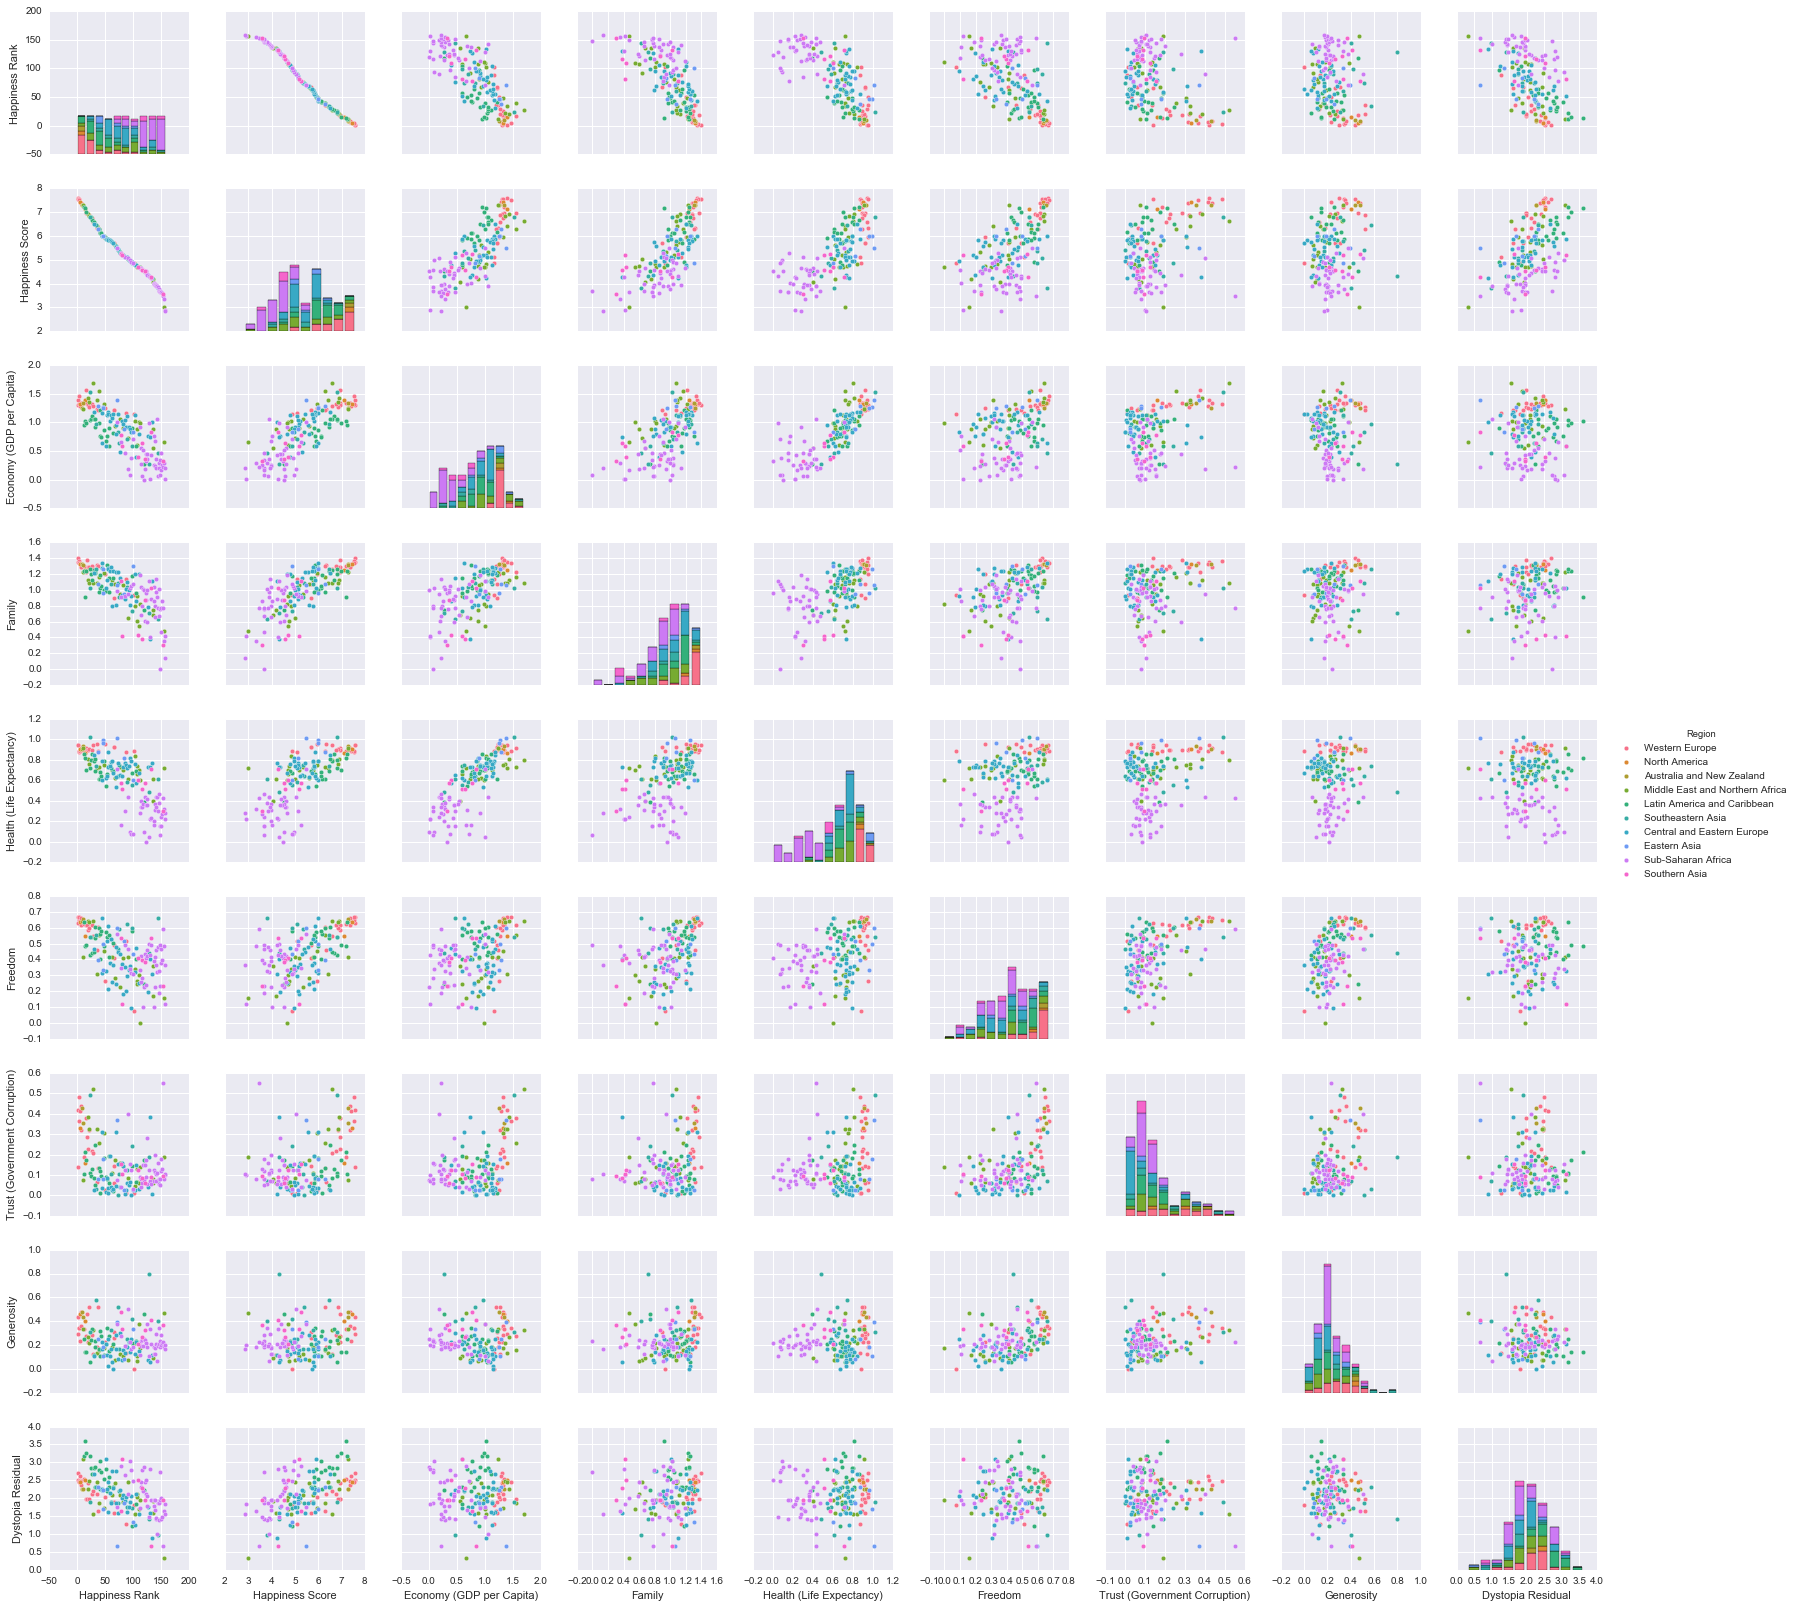

In [15]:
sns.pairplot(happiness2015, vars=["Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"], hue = "Region")

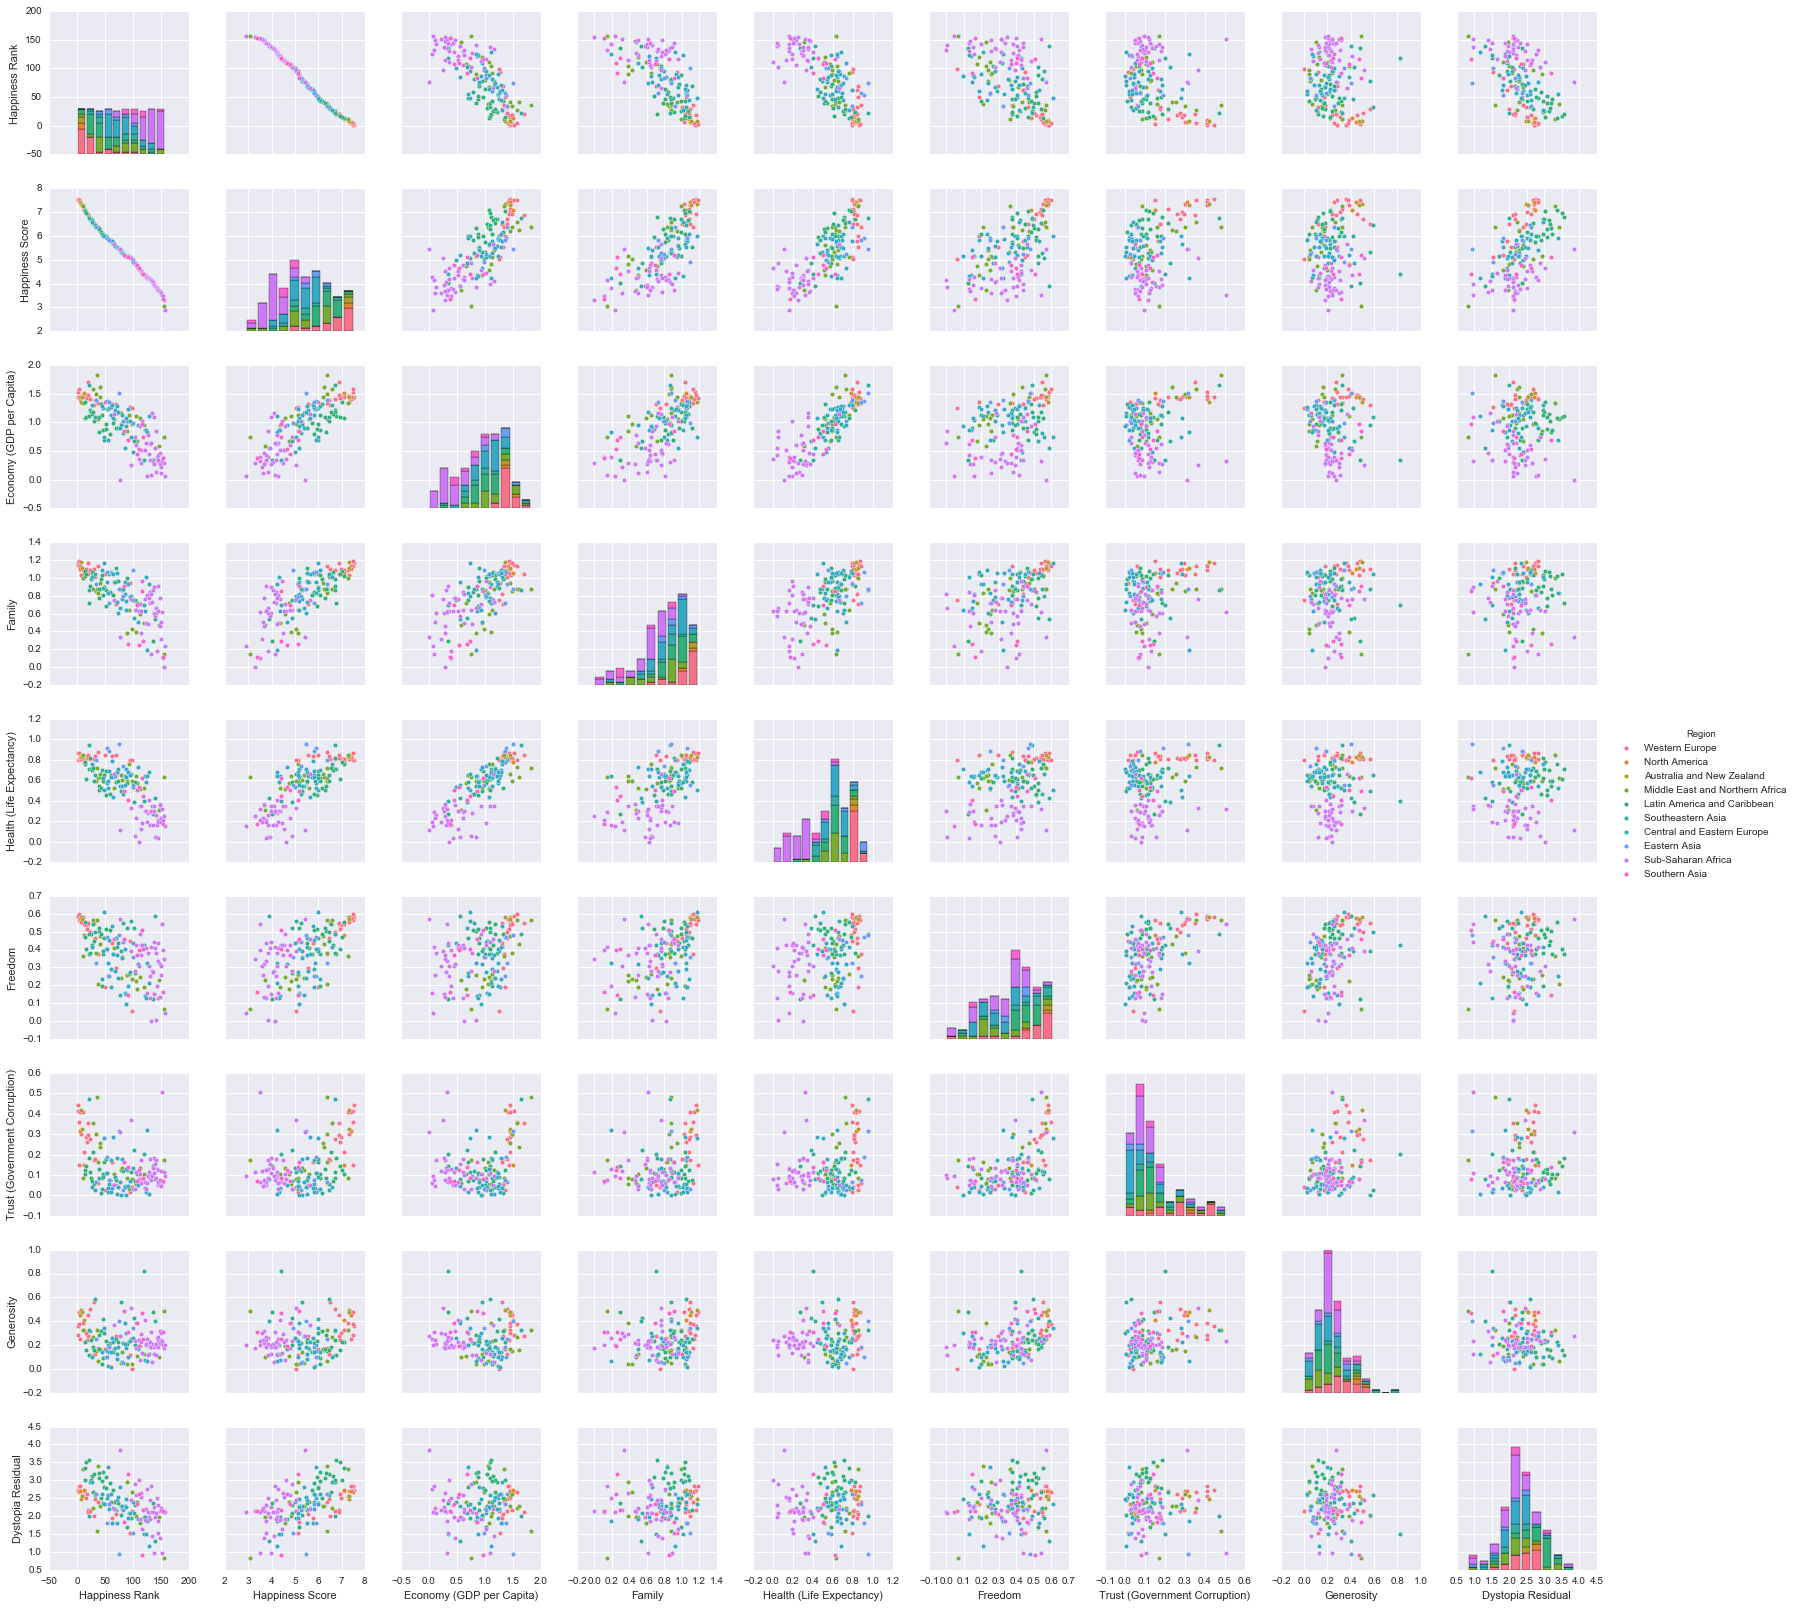

In [18]:
sns.pairplot(happiness2016, vars=["Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"], hue = "Region")

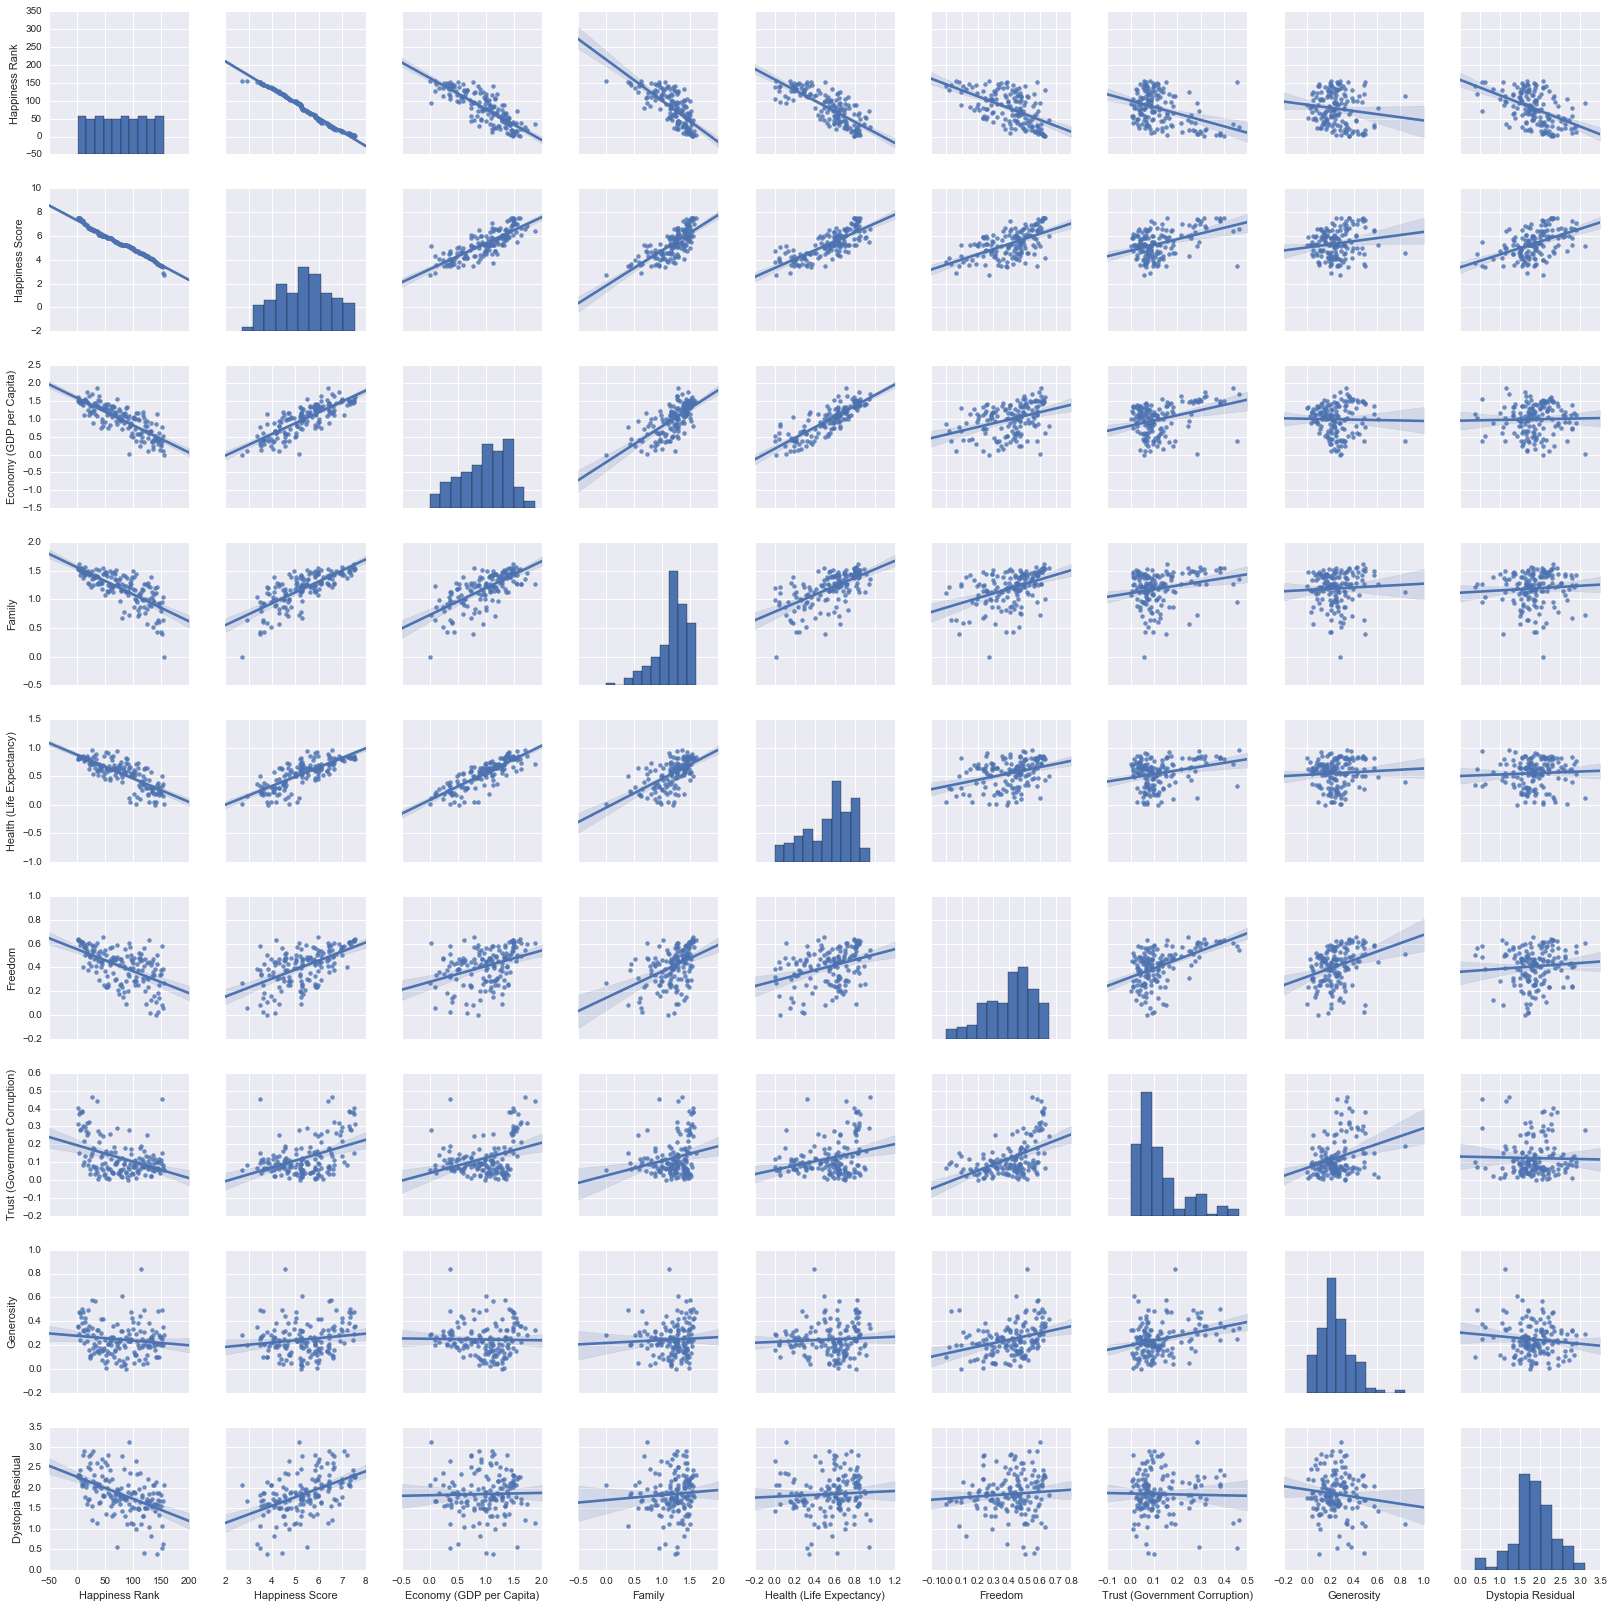

In [43]:
sns.pairplot(happiness2017, vars=["Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"], kind="reg")

I will explore the variable relations more closely using heatmaps showing the correlation between variables.
The strongest correlations can be found between Economy and Health, Family and Econmy, and Health and Family.
Another intesting correlation, which might be expected, is between Freedom and Trust in Government.

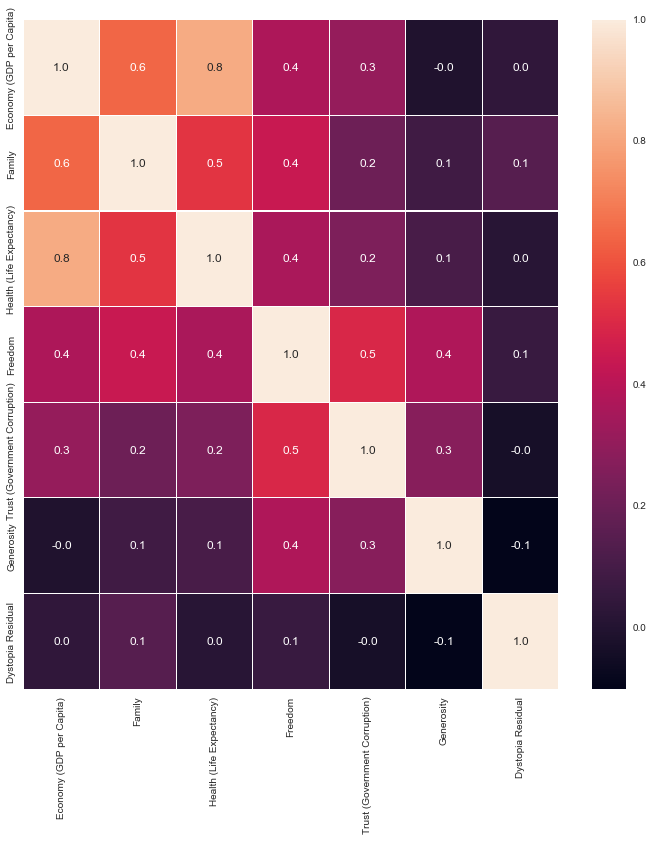

In [33]:
df=happiness2015.loc[:, 'Economy (GDP per Capita)':'Dystopia Residual']
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=df.corr(),annot=True, linewidths=.25, fmt= '.1f',ax=ax)
plt.show()

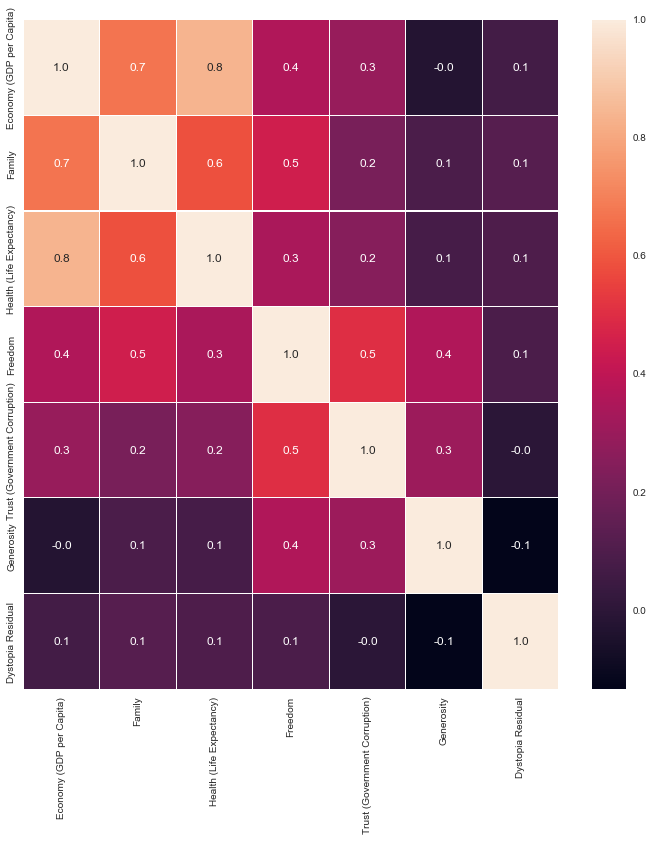

In [34]:
df=happiness2016.loc[:, 'Economy (GDP per Capita)':'Dystopia Residual']
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=df.corr(),annot=True, linewidths=.25, fmt= '.1f',ax=ax)
plt.show()

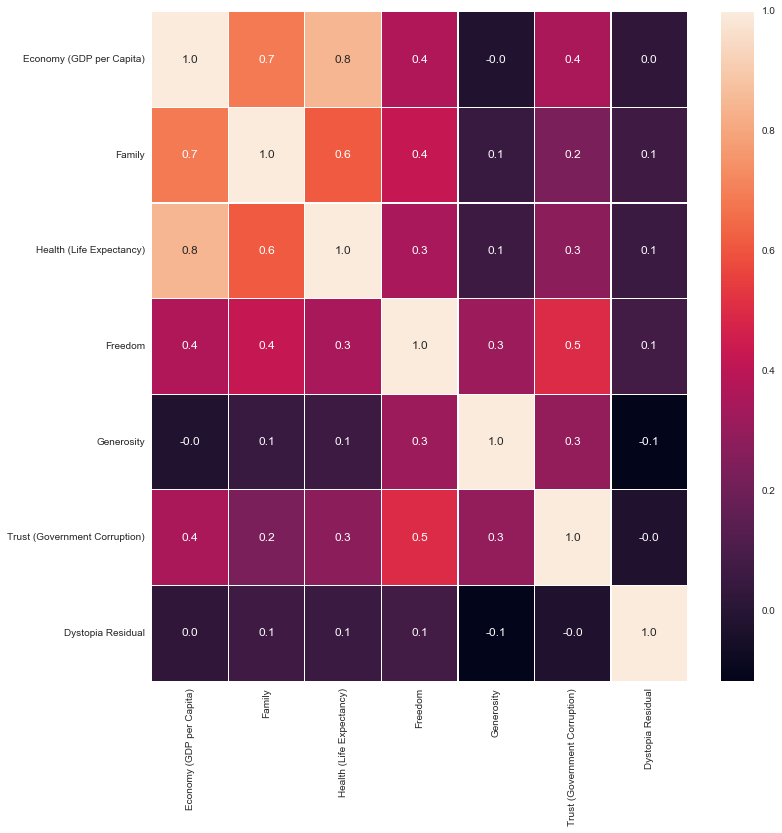

In [44]:
df=happiness2017.loc[:, 'Economy (GDP per Capita)':'Dystopia Residual']
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=df.corr(),annot=True, linewidths=.25, fmt= '.1f',ax=ax)
plt.show()

The first type of clustering to be performed will be hierarchial.  Which will allow me to rank the rows based on the variable scores. Using the agglomerative clustering and setting the number of clusters to the number of rows, each row will be given essentially a rank.

I will try different affinity (or distance) types, including euclidean, manhattan and cosine.  With manhanattan and cosine I will also explore different linkages of complete and average.

In [63]:
from sklearn.cluster import AgglomerativeClustering
cluster2015 = AgglomerativeClustering(n_clusters=158, affinity='euclidean').fit(hap2015)
cluster2015.labels_

array([154,  88, 151, 108, 157, 118, 143, 153, 155, 104, 131,  97, 152,
        79,  95, 150, 113,  76, 134, 122,  78, 101, 146,  98, 149, 126,
       114, 107, 138, 100, 112,  91, 139, 115,  75, 137,  37, 140,  53,
        94, 129, 125, 147, 156,  68, 111,  96, 148,  47,  84, 102,  77,
       123, 124, 119, 116, 120,  92, 144,  85, 141,  81, 117,  86,  83,
        73, 133,  48,  59, 145, 142,  58, 127,  93,  89,  38,  62, 128,
       109, 136,  99,  69,  57,  61,  42,  70,  72, 130,  71,  55,  74,
        41, 103,  63,  82, 132,  49, 105,  56,  40, 110, 106,  90, 135,
        54,  67, 121,  30,  50,  20,  35,  87,  80,  23,  33,  34,  46,
        65,  44,  64,  51,  43,  45,  60,  24,  16,  66,  39,  19,  18,
        31,  21,  26,  36,  52,  25,  28,  12,  17,  32,  29,   8,  15,
         9,  22,   7,  14,  11,  10,  27,  13,   4,   5,   6,   2,   3,
         1,   0], dtype=int64)

In [64]:
cluster2015mc = AgglomerativeClustering(n_clusters=158, affinity='manhattan', linkage='complete').fit(hap2015)
cluster2015mc.labels_

array([153, 101, 152, 121, 157, 122, 131,  86, 156, 139, 141,  99, 150,
        95, 102, 149, 103, 154, 142, 129,  87, 135,  96, 119, 151,  89,
       124, 115, 134, 148,  90,  93, 138,  83,  97, 126, 136, 132, 111,
       118,  91, 116, 146,  92, 143, 120, 127, 145, 144,  72,  94, 114,
        81,  71, 133,  59, 117, 113, 100,  82, 140,  46,  98, 109, 147,
       112, 137,  45,  50, 125,  67,  84, 123,  85,  41, 155, 107, 108,
       110, 130,  49,  22,  75,  57,  79,  73,  69,  68, 128, 104,  64,
        78,  88,  62,  70,  53,  48,  42,  34,  55,  40, 105, 106,  74,
        56,  66,  44,  76,  47,  63,  77,  36,  35,  51,  60,  80,  39,
        31,  27,  24,  65,  19,  54,  33,  52,  29,  32,  38,  20,  25,
        58,  43,  23,  37,  21,  26,  28,  61,  15,  30,  12,  16,   7,
        17,  14,   9,  10,  18,   8,  11,  13,   4,   3,   5,   6,   2,
         1,   0], dtype=int64)

In [65]:
cluster2015ms = AgglomerativeClustering(n_clusters=158, affinity='manhattan', linkage='average').fit(hap2015)
cluster2015ms.labels_

array([153, 109, 152, 100, 157, 136, 116,  90, 156, 139, 119, 101, 150,
       143,  86, 147,  97, 154, 140, 128, 148,  92, 117, 103, 151,  94,
       120,  87, 133, 149,  73,  95, 142, 145,  85, 122, 134, 130, 106,
       118,  91, 110, 146, 121, 141, 115,  80, 144,  82,  93, 126,  83,
        46,  71,  69, 124, 112,  89, 113,  88, 138,  81,  74, 129, 111,
       108,  70,  84,  78,  58, 114,  99,  79, 155,  77,  38, 104, 125,
       105, 131,  96, 123, 132,  44,  36,  72, 137, 135, 127,  68,  63,
        67,  98,  60,  57,  48,  45,  76,  41,  56,  22,  59, 102,  43,
       107,  65,  64,  35,  42,  21,  17,  28,  61,  49,  34,  66,  53,
        62,  52,  20,  47,  50,  30,  32,  24,  54,  31,  29,  51,  33,
        26,  75,  10,  39,  15,  25,  55,  37,  40,  14,  27,  16,  12,
        18,  19,   8,  23,   7,  11,   5,   9,  13,   3,   4,   6,   2,
         1,   0], dtype=int64)

In [66]:
cluster2015c = AgglomerativeClustering(n_clusters=158, affinity='cosine', linkage='complete').fit(hap2015)
cluster2015c.labels_

array([156, 130, 155, 140, 157, 138,  88, 127, 153, 111, 146, 145, 152,
       142, 149, 147, 113, 150, 117, 148,  80, 102, 118, 109, 141, 119,
        81,  79,  58,  82, 110,  39, 121, 154,  72, 137,  89, 144, 106,
       123,  77, 132,  68,  97, 105, 124, 133, 101,  70, 114, 134,  90,
        99, 128,  95, 126, 100, 136, 151,  98, 143, 129, 135,  44, 112,
        56,  74, 115,  85, 125,  54, 103, 139,  61,  50,  73, 122,  87,
        40,  67,  19,  71, 108, 120, 104,  96, 116,  91,  60,  66,  48,
       131,  63,  69,  59,  57,  65,  32,  86,  78,  75,  83, 107,  92,
        33,  84,  76,  41,  36,  49,  93,  45,  42,  24,  53,  55,  43,
        26,  37,  94,  64,  28,  21,  46,  27,  34,  38,  29,  31,  35,
        52,  13,  17,  15,  62,  47,  18,  51,  20,   9,  22,  30,  16,
        14,  23,  10,  11,   6,  25,   8,   4,   7,   3,   1,  12,   5,
         2,   0], dtype=int64)

With the different agglomerative clustering performed, I will now add the labels to the original data as new columns.

In [67]:
happiness2015['HCluster']=cluster2015.labels_
happiness2015['McCluster']=cluster2015mc.labels_
happiness2015['MsCluster']=cluster2015ms.labels_
happiness2015['CCluster']=cluster2015c.labels_

Now I can rank based on my agglomerative clustering and see where the different countries end up. I will look at the top 10, and the bottom 10.

In [68]:
happiness2015.nlargest(10,'HCluster')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,157,157,157,157
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,156,92,121,97
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,155,156,156,153
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,154,153,153,156
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,153,86,90,127
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,152,150,150,152
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,151,152,152,155
15,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001,150,149,147,147
24,Panama,Latin America and Caribbean,25,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848,149,151,151,141
47,Ecuador,Latin America and Caribbean,48,5.975,0.04528,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,2.53942,148,145,144,101


In [69]:
happiness2015.nsmallest(10,'HCluster')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,0,0,0,0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1,1,1,2
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2,6,6,12
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3,2,2,5
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,4,4,13,7
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,5,3,3,3
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,6,5,4,1
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079,7,9,8,10
141,Senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395,8,16,16,30
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877,9,17,18,14


In [70]:
happiness2015.nlargest(10,'McCluster')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,157,157,157,157
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,155,156,156,153
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528,38,155,38,73
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570,76,154,154,150
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,154,153,153,156
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,151,152,152,155
24,Panama,Latin America and Caribbean,25,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848,149,151,151,141
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,152,150,150,152
15,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001,150,149,147,147
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,100,148,149,82


In [71]:
happiness2015.nsmallest(10,'McCluster')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,0,0,0,0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1,1,1,2
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3,2,2,5
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,5,3,3,3
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,4,4,13,7
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,6,5,4,1
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2,6,6,12
142,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895,15,7,12,16
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296,10,8,11,25
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079,7,9,8,10


In [72]:
happiness2015.nlargest(10,'MsCluster')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,157,157,157,157
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,155,156,156,153
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399,93,85,155,61
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570,76,154,154,150
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,154,153,153,156
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,151,152,152,155
24,Panama,Latin America and Caribbean,25,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848,149,151,151,141
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,152,150,150,152
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,100,148,149,82
20,United Kingdom,Western Europe,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994,78,87,148,80


In [73]:
happiness2015.nsmallest(10,'MsCluster')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,0,0,0,0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1,1,1,2
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3,2,2,5
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,5,3,3,3
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,6,5,4,1
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172,27,11,5,8
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2,6,6,12
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230,11,18,7,6
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079,7,9,8,10
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,13,13,9,4


In [74]:
happiness2015.nlargest(10,'CCluster')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,157,157,157,157
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,154,153,153,156
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,151,152,152,155
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945,115,83,145,154
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,155,156,156,153
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,152,150,150,152
58,Belarus,Central and Eastern Europe,59,5.813,0.03938,1.03192,1.23289,0.73608,0.37938,0.19090,0.11046,2.13090,144,100,113,151
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570,76,154,154,150
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011,95,102,86,149
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,122,129,128,148


In [75]:
happiness2015.nsmallest(10,'CCluster')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,0,0,0,0
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,6,5,4,1
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1,1,1,2
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,5,3,3,3
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,13,13,9,4
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3,2,2,5
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230,11,18,7,6
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,4,4,13,7
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172,27,11,5,8
139,Comoros,Sub-Saharan Africa,140,3.956,0.04797,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,1.95812,32,30,14,9


I will perform the same agglomerative clustering on the 2016 and 2017 datasets.

In [81]:
from sklearn.cluster import AgglomerativeClustering
cluster2016 = AgglomerativeClustering(n_clusters=157, affinity='euclidean').fit(hap2016)
cluster2016.labels_

array([148, 150, 110, 119,  94, 156,  96, 140, 154, 145, 133, 149, 100,
       112, 138, 152, 135,  92, 153, 111, 107,  88,  82, 134, 109, 144,
        54, 118,  79, 102,  87, 116, 155,  43, 151, 123, 131,  84, 117,
        91, 137, 108, 129,  83,  75,  81, 124, 141, 127, 104, 147, 125,
       115, 136,  85, 139,  80,  40,  78,  89, 128,  90,  53, 121,  76,
        86,  98, 142,  63, 106,  66,  37, 120,  58,  57,  39,  77,  55,
       103,  67, 113, 130, 114, 132,  95,  38,  45,  28, 101,  99,  93,
        73, 122,  74,  64,  68,  41,  69,  46,  70,  44,  34, 143,  71,
        65, 146,  56, 126,  26,  42,  19,  22,  97,  21,  72,  35, 105,
        48,  18,  31,  52,  47,  33,  32,  23,  20,  16,  51,  62,  61,
        59,  25,   9,  27,  36,  10,  50,  15,   4,  49,  30,  60,  12,
        13,  24,  11,   7,  29,  17,  14,   5,   6,   8,   3,   2,   1,
         0], dtype=int64)

In [82]:
cluster2016mc = AgglomerativeClustering(n_clusters=157, affinity='manhattan', linkage='complete').fit(hap2016)
cluster2016mc.labels_

array([149, 148, 116,  95, 113, 156,  85, 144, 155, 128, 153, 150, 126,
       111, 137, 152, 151,  77,  75, 118, 101,  82, 115, 109,  91, 142,
       122,  81, 123,  97, 121,  99,  80,  87, 107,  98, 140, 100, 120,
        89, 147, 125,  49,  73, 154,  92, 114, 143,  57, 103, 145, 129,
       134, 146,  78, 136,  45, 106,  56, 108, 119,  60, 110, 132, 141,
       138,  90,  68,  59, 133, 130,  64, 117,  88,  79, 127,  93,  72,
       104, 124,  44,  96,  47, 131, 102,  76,  74, 139,  43,  63,  51,
        58, 135,  36,  71,  69,  67,  61,  62,  65,  50,  66,  94,  70,
        35,  17, 112,  86,  31,  39, 105,  40,  42,  28,  29,  55,  83,
        53,  46,  22,  52,  48,  54,  32,  34,  38,  15,  23,  33,  30,
        27,  84,  16,  25,  26,  41,  24,  14,  19,  37,  11,  13,  12,
         5,  18,  20,  21,   9,   8,   7,   6,  10,   3,   2,   4,   1,
         0], dtype=int64)

In [83]:
cluster2016ms = AgglomerativeClustering(n_clusters=157, affinity='manhattan', linkage='average').fit(hap2016)
cluster2016ms.labels_

array([149, 148, 114, 146,  89, 156, 101,  99, 155, 134, 147, 150,  88,
       104, 135, 152, 102, 121, 151, 116,  93,  79,  81, 113, 117, 141,
       125, 126, 109, 110, 123,  90, 137,  84, 145, 127, 138,  91, 118,
       100,  73, 103, 105,  75, 154,  56,  54, 142,  92,  68, 143, 128,
       132,  72, 139, 144,  83, 112,  45, 115, 119, 120,  51,  96,  58,
       129,  70, 136, 106, 131,  63,  80, 140,  67,  87,  71,  85, 122,
        94,  60,  43,  46,  41,  86,  52, 153,  65,  74,  82,  62,  78,
        76, 133,  36, 130, 111,  95, 108,  77,  64,  22,  49,  42,  69,
        59,  34,  47,  50, 124,  31,  97,  40,  57,  44,  29,  20,  33,
        35,  25,  66, 107,  21,  32,  15,  24,  61,  39,  37,  53,  30,
        26,  10,  98,  19,  48,  38,  23,  14,  28,  16,  12,  55,  27,
         9,  17,  18,  11,   8,   4,   7,   5,  13,   3,   6,   1,   2,
         0], dtype=int64)

In [84]:
cluster2016c = AgglomerativeClustering(n_clusters=157, affinity='cosine', linkage='complete').fit(hap2016)
cluster2016c.labels_

array([140, 148, 118, 149,  92, 156, 117, 133, 155, 113,  77, 153, 151,
       125, 152, 129, 143,  98, 147,  95, 120, 139, 132,  87, 130, 141,
       128,  99, 108, 106,  96, 109, 126, 112, 137, 100, 124,  88, 154,
       145, 119, 104,  76, 135, 138, 144,  90, 142,  68, 131,  81, 150,
       103,  69,  70, 121,  74, 136,  49, 105, 111, 115,  82,  89, 110,
       122, 116, 114, 102,  71,  57, 146, 107,  72,  91,  73,  85, 123,
        43,  94,  93,  53,  34,  79,  84, 134,  83,  45,  97,  51,  35,
        44,  48, 101,  67, 127,  60,  65,  50,  78,  62,  46,  55,  58,
        28,  63,  75,  66,  41,  56,  80,  59,  86,  38,  32,  40,  33,
        54,  39,  27,  26,  61,  19,  64,  42,  47,  31,  52,  29,  22,
        24,  25,  20,  21,  10,  13,  15,  23,   9,  37,  18,  16,  30,
        14,   4,  36,  17,  11,   7,  12,   8,   6,   5,   3,   2,   1,
         0], dtype=int64)

With the different agglomerative clustering performed, I will now add the labels to the original data as new columns.

In [85]:
happiness2016['HCluster']=cluster2016.labels_
happiness2016['McCluster']=cluster2016mc.labels_
happiness2016['MsCluster']=cluster2016ms.labels_
happiness2016['CCluster']=cluster2016c.labels_

Now I can rank based on my agglomerative clustering and see where the different countries end up. I will look at the top 10, and the bottom 10.

In [86]:
happiness2016.nlargest(10,'HCluster')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,156,156,156,156
32,Thailand,Southeastern Asia,33,6.474,6.396,6.552,1.08930,1.04477,0.64915,0.49553,0.02833,0.58696,2.57960,155,80,137,126
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,154,155,155,155
18,Ireland,Western Europe,19,6.907,6.836,6.978,1.48341,1.16157,0.81455,0.54008,0.29754,0.44963,2.15988,153,75,151,147
15,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931,152,152,152,129
34,Taiwan,Eastern Asia,34,6.379,6.305,6.453,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523,151,107,145,137
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,150,148,148,148
11,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343,149,150,150,153
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,148,149,149,140
50,Ecuador,Latin America and Caribbean,51,5.976,5.880,6.072,0.97306,0.85974,0.68613,0.40270,0.18037,0.10074,2.77366,147,145,143,81


In [87]:
happiness2016.nsmallest(10,'HCluster')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,0,0,0,0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,1,1,2,1
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2,4,1,2
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3,2,6,3
138,Ivory Coast,Sub-Saharan Africa,139,3.916,3.826,4.006,0.55507,0.57576,0.04476,0.40663,0.15530,0.20338,1.97478,4,19,28,9
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604,5,6,5,8
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,6,10,13,6
146,Yemen,Middle East and Northern Africa,147,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295,7,21,11,17
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,8,3,3,5
132,Sudan,Sub-Saharan Africa,133,4.139,3.928,4.350,0.63069,0.81928,0.29759,0.00000,0.10039,0.18077,2.10995,9,16,98,20


In [88]:
happiness2016.nlargest(10,'McCluster')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,156,156,156,156
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,154,155,155,155
44,Slovakia,Central and Eastern Europe,45,6.078,5.996,6.160,1.27973,1.08268,0.70367,0.23391,0.02947,0.13837,2.61065,75,154,154,138
10,Israel,Middle East and Northern Africa,11,7.267,7.199,7.335,1.33766,0.99537,0.84917,0.36432,0.08728,0.32288,3.31029,133,153,147,77
15,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931,152,152,152,129
16,Brazil,Latin America and Caribbean,17,6.952,6.875,7.029,1.08754,1.03938,0.61415,0.40425,0.14166,0.15776,3.50733,135,151,102,143
11,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343,149,150,150,153
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,148,149,149,140
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,150,148,148,148
40,Kuwait,Middle East and Northern Africa,41,6.239,6.154,6.324,1.61714,0.87758,0.63569,0.43166,0.23669,0.15965,2.28085,137,147,73,119


In [89]:
happiness2016.nsmallest(10,'McCluster')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,0,0,0,0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,1,1,2,1
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3,2,6,3
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,8,3,3,5
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2,4,1,2
143,Chad,Sub-Saharan Africa,144,3.763,3.672,3.854,0.42214,0.63178,0.03824,0.12807,0.04952,0.18667,2.30637,13,5,9,14
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604,5,6,5,8
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284,14,7,7,12
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769,17,8,4,7
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075,29,9,8,11


In [90]:
happiness2016.nlargest(10,'MsCluster')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,156,156,156,156
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,154,155,155,155
44,Slovakia,Central and Eastern Europe,45,6.078,5.996,6.160,1.27973,1.08268,0.70367,0.23391,0.02947,0.13837,2.61065,75,154,154,138
85,Serbia,Central and Eastern Europe,86,5.177,5.083,5.271,1.03437,0.81329,0.64580,0.15718,0.04339,0.20737,2.27539,38,76,153,134
15,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931,152,152,152,129
18,Ireland,Western Europe,19,6.907,6.836,6.978,1.48341,1.16157,0.81455,0.54008,0.29754,0.44963,2.15988,153,75,151,147
11,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343,149,150,150,153
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,148,149,149,140
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,150,148,148,148
10,Israel,Middle East and Northern Africa,11,7.267,7.199,7.335,1.33766,0.99537,0.84917,0.36432,0.08728,0.32288,3.31029,133,153,147,77


In [91]:
happiness2016.nsmallest(10,'MsCluster')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,0,0,0,0
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2,4,1,2
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,1,1,2,1
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,8,3,3,5
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769,17,8,4,7
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604,5,6,5,8
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3,2,6,3
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284,14,7,7,12
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075,29,9,8,11
143,Chad,Sub-Saharan Africa,144,3.763,3.672,3.854,0.42214,0.63178,0.03824,0.12807,0.04952,0.18667,2.30637,13,5,9,14


In [92]:
happiness2016.nlargest(10,'CCluster')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,156,156,156,156
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,154,155,155,155
38,Guatemala,Latin America and Caribbean,39,6.324,6.213,6.435,0.83454,0.87119,0.54039,0.50379,0.08701,0.28808,3.19863,117,120,118,154
11,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343,149,150,150,153
14,Puerto Rico,Latin America and Caribbean,15,7.039,6.794,7.284,1.35943,1.08113,0.77758,0.46823,0.12275,0.22202,3.00760,138,137,135,152
12,United States,North America,13,7.104,7.020,7.188,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782,100,126,88,151
51,Belize,Latin America and Caribbean,52,5.956,5.710,6.202,0.87616,0.68655,0.45569,0.51231,0.10771,0.23684,3.08039,125,129,128,150
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,119,95,146,149
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,150,148,148,148
18,Ireland,Western Europe,19,6.907,6.836,6.978,1.48341,1.16157,0.81455,0.54008,0.29754,0.44963,2.15988,153,75,151,147


In [93]:
happiness2016.nsmallest(10,'CCluster')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,0,0,0,0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,1,1,2,1
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2,4,1,2
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3,2,6,3
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319,24,18,17,4
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,8,3,3,5
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,6,10,13,6
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769,17,8,4,7
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604,5,6,5,8
138,Ivory Coast,Sub-Saharan Africa,139,3.916,3.826,4.006,0.55507,0.57576,0.04476,0.40663,0.15530,0.20338,1.97478,4,19,28,9


In [94]:
from sklearn.cluster import AgglomerativeClustering
cluster2017 = AgglomerativeClustering(n_clusters=155, affinity='euclidean').fit(hap2017)
cluster2017.labels_

array([152, 143, 109,  79, 116, 150, 148, 151, 146,  97,  90, 101, 154,
       122, 141,  83, 104,  80,  85,  91, 106, 129,  87, 142, 121,  92,
        88, 137,  99, 133, 110,  78, 123, 126,  77,  45,  38, 125, 138,
        43, 145,  93,  84,  72, 111, 144,  54, 153, 139, 114,  60, 127,
       124, 136,  94,  82, 103, 130, 149, 128, 135, 112, 132,  89,  63,
       117,  64, 134,  75, 140,  62,  71, 115,  98,  66, 119,  95,  61,
        96,  35,  57, 107, 131,  51, 108,  76,  44,  74, 100,  41, 120,
        37, 147,  86,  81,  65,  47,  49, 118,  59,  42,  55,  70, 105,
        48,  69,  68,  23,  46,  52,  53,  73, 102,  50,  58,  29,  24,
        26,  25, 113,  39,  12,  18,  56,  31,  21,  11,  22,  67,  33,
        28,  32,  27,  36,  34,  20,  30,  14,  15,  16,   5,  13,  17,
        10,   7,  40,   8,   3,  19,   9,   6,   4,   2,   1,   0],
      dtype=int64)

In [95]:
cluster2017mc = AgglomerativeClustering(n_clusters=155, affinity='manhattan', linkage='complete').fit(hap2017)
cluster2017mc.labels_

array([151, 146, 131, 130, 100,  93, 153, 123, 150, 124, 111,  85, 154,
       107, 135, 147, 106,  99, 145, 137, 133, 121,  77,  72, 104,  94,
        76, 139,  91,  80, 117,  81,  97, 125,  46,  90,  78, 108, 138,
       116, 126, 129, 148, 140, 109, 141, 132,  96, 142, 120,  65,  98,
        83, 134, 101,  38, 103, 149,  53,  69,  68, 110, 152, 105,  82,
        54,  64, 128,  73, 144,  84,  70, 136, 118,  66, 102,  86, 119,
       115,  40, 127,  89,  75,  92,  57,  41,  49, 143,  48,  51,  61,
        50,  71,  35,  95,  62,  79,  63,  47,  58,  45, 113,  67,  32,
       112, 114,  55,  22,  23,  33,  37,  52,  25,  87,  28, 122,  24,
        88,  44,  60,  74,  11,  18,  56,  59,  42,  26,  43,  31,  29,
        34,  21,  30,  36,  12,  20,  16,  27,   5,  14,  15,  17,   8,
        10,  39,  19,   9,   7,   4,  13,   6,   3,   2,   1,   0],
      dtype=int64)

In [96]:
cluster2017ms = AgglomerativeClustering(n_clusters=155, affinity='manhattan', linkage='average').fit(hap2017)
cluster2017ms.labels_

array([150, 147, 128, 115, 131, 153, 154, 141, 151, 123, 105,  93,  76,
       106, 134, 149, 101, 139, 100, 107,  95, 132, 143, 145,  96,  87,
        84, 138,  86, 102, 111,  74,  78, 121, 146,  79, 142, 103, 136,
       118, 113, 140,  65,  69,  80,  70,  52,  83,  34, 117, 129,  98,
        39, 133,  50,  99, 114, 116, 119,  47, 137, 104,  49,  89,  85,
       109, 126, 125, 127, 144, 152,  58, 135,  92, 130, 124,  77,  57,
       110,  41,  51, 112,  90,  25,  64,  75,  54,  71,  44,  66, 120,
       148,  63,  91,  88, 122,  67,  97,  28,  81,  82, 108,  48,  55,
        43,  72,  38,  40,  62,  94,  45,  68,  31,  33,  56,  59,  46,
        27,  73,  21,  37,  23,  18,  53,  26,  24,  11,  22,  12,  16,
        35,  32,  13,  36,  42,  19,  60,  20,   9,  29,  15,   5,  17,
         8,   7,  61,  30,  14,   3,   6,  10,   2,   4,   1,   0],
      dtype=int64)

In [97]:
cluster2017c = AgglomerativeClustering(n_clusters=155, affinity='cosine', linkage='complete').fit(hap2017)
cluster2017c.labels_

array([149, 140, 142, 109, 107, 147, 103, 146, 145,  95, 153, 131, 151,
       134, 148, 138, 139,  91,  79, 101, 100, 150,  69, 154, 132,  74,
        89, 144, 137, 122, 118, 129, 127, 128,  85, 133, 112,  93, 121,
       152,  92,  94, 126, 141, 102, 136,  72,  70, 130, 106,  97,  46,
        64,  81,  50, 123,  78, 117,  65,  45, 114,  98,  48, 105,  75,
        86, 104, 111, 143, 135,  55,  96, 108,  90, 110,  76,  58, 115,
        34,  82,  77, 113, 116,  56,  57,  52,  73,  68,  22,  47,  67,
       119,  28,  87,  99, 125,  62,  63,  88,  51,  60,  83,  44,  27,
        53,  84,  38,  13,  80,  71,  40,  39, 124,  35,  33,  49,  42,
        41,  25,  43,  21,  66,  32,  23,  16,  19,  37,  10,  36,  54,
        24,  26, 120,  61,  31,  59,  12,  18,  11,  20,  30,   9,  17,
        15,  29,  14,   5,   8,   4,   7,   6,   3,   1,   2,   0],
      dtype=int64)

With the different agglomerative clustering performed, I will now add the labels to the original data as new columns.

In [98]:
happiness2017['HCluster']=cluster2017.labels_
happiness2017['McCluster']=cluster2017mc.labels_
happiness2017['MsCluster']=cluster2017ms.labels_
happiness2017['CCluster']=cluster2017c.labels_

Now I can rank based on my agglomerative clustering and see where the different countries end up. I will look at the top 10, and the bottom 10.

In [99]:
happiness2017.nlargest(10,'HCluster')

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
12,Austria,13,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,154,154,76,151
47,Italy,48,5.964,6.042737,5.885264,1.395067,1.444923,0.853144,0.256451,0.172790,0.028028,1.813312,153,96,83,70
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,152,151,150,149
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,151,123,141,146
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,150,93,153,147
58,Turkmenistan,59,5.822,5.885181,5.758819,1.130777,1.493149,0.437726,0.418272,0.249925,0.259270,1.832910,149,53,119,65
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,148,153,154,103
92,Somalia,93,5.151,5.242484,5.059516,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,147,71,63,28
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,146,150,151,145
40,Bahrain,41,6.087,6.178989,5.995011,1.488412,1.323110,0.653133,0.536747,0.172668,0.257042,1.656149,145,126,113,92


In [100]:
happiness2017.nsmallest(10,'HCluster')

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0,0,0,0
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,1,1,1,2
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2,2,4,1
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,3,7,14,8
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,4,3,2,3
140,Afghanistan,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,5,15,15,30
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,6,6,10,6
144,Haiti,145,3.603,3.734715,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,7,39,7,29
146,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,8,9,30,5
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,9,13,6,7


In [101]:
happiness2017.nlargest(10,'McCluster')

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
12,Austria,13,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,154,154,76,151
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,148,153,154,103
62,Peru,63,5.715,5.811947,5.618054,1.035225,1.218770,0.630166,0.450003,0.126820,0.047049,2.207269,132,152,49,48
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,152,151,150,149
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,146,150,151,145
57,Bolivia,58,5.823,5.903977,5.742023,0.833757,1.227619,0.473630,0.558733,0.225561,0.060478,2.443279,130,149,116,117
42,Nicaragua,43,6.071,6.186584,5.955417,0.737299,1.287216,0.653096,0.447552,0.301674,0.130688,2.513931,84,148,65,126
15,Germany,16,6.951,7.005382,6.896619,1.487923,1.472520,0.798951,0.562511,0.336269,0.276732,2.015770,83,147,149,138
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,143,146,147,140
18,United Kingdom,19,6.714,6.783792,6.644209,1.441634,1.496460,0.805336,0.508190,0.492774,0.265428,1.704144,85,145,100,79


In [102]:
happiness2017.nsmallest(10,'McCluster')

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0,0,0,0
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,1,1,1,2
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2,2,4,1
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,4,3,2,3
148,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,19,4,3,4
138,Lesotho,139,3.808,4.044344,3.571656,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,15,5,9,11
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,6,6,10,6
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,3,7,14,8
142,Benin,143,3.657,3.745784,3.568217,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631,17,8,17,17
146,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,8,9,30,5


In [103]:
happiness2017.nlargest(10,'MsCluster')

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,148,153,154,103
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,150,93,153,147
70,"Hong Kong S.A.R., China",71,5.472,5.549594,5.394406,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,62,84,152,55
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,146,150,151,145
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,152,151,150,149
15,Germany,16,6.951,7.005382,6.896619,1.487923,1.472520,0.798951,0.562511,0.336269,0.276732,2.015770,83,147,149,138
91,Macedonia,92,5.175,5.272173,5.077828,1.064578,1.207893,0.644948,0.325906,0.253761,0.060278,1.617469,37,50,148,119
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,143,146,147,140
34,Qatar,35,6.375,6.568477,6.181523,1.870766,1.274297,0.710098,0.604131,0.330474,0.439299,1.145464,77,46,146,85
23,Argentina,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,142,72,145,154


In [104]:
happiness2017.nsmallest(10,'MsCluster')

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0,0,0,0
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,1,1,1,2
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,4,3,2,3
148,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,19,4,3,4
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2,2,4,1
141,Botswana,142,3.766,3.874123,3.657877,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914,13,17,5,9
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,9,13,6,7
144,Haiti,145,3.603,3.734715,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,7,39,7,29
143,Madagascar,144,3.644,3.714319,3.573681,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,1.584613,10,10,8,15
138,Lesotho,139,3.808,4.044344,3.571656,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,15,5,9,11


In [105]:
happiness2017.nlargest(10,'CCluster')

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
23,Argentina,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,142,72,145,154
10,Israel,11,7.213,7.279853,7.146146,1.375382,1.376290,0.838404,0.405989,0.330083,0.085242,2.801757,90,111,105,153
39,Slovakia,40,6.098,6.177348,6.018652,1.325394,1.505059,0.712733,0.295817,0.136544,0.024211,2.097777,43,116,118,152
12,Austria,13,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,154,154,76,151
21,Brazil,22,6.635,6.725470,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,0.111093,2.769267,129,121,132,150
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,152,151,150,149
14,Ireland,15,6.977,7.043352,6.910649,1.535707,1.558231,0.809783,0.573110,0.427858,0.298388,1.773869,141,135,134,148
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,150,93,153,147
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,151,123,141,146
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,146,150,151,145


In [106]:
happiness2017.nsmallest(10,'CCluster')

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0,0,0,0
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2,2,4,1
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,1,1,1,2
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,4,3,2,3
148,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,19,4,3,4
146,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,8,9,30,5
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,6,6,10,6
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,9,13,6,7
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,3,7,14,8
141,Botswana,142,3.766,3.874123,3.657877,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914,13,17,5,9


Next type of clustering I will try is the Kmeans.

The optimal number of neighbors is 3


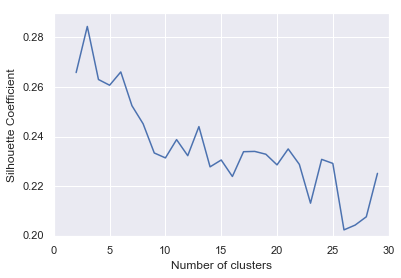

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
k_range = range(2, 30)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(hap2015)
    scores.append(metrics.silhouette_score(hap2015, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of neighbors is %d" % optimal_k
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)  

The optimal number of neighbors is 2


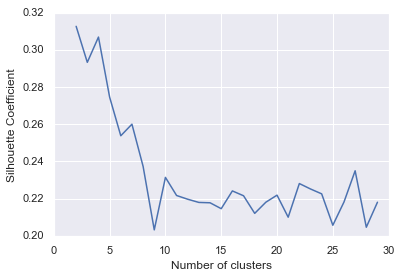

In [63]:
from sklearn.cluster import KMeans
from sklearn import metrics
k_range = range(2, 30)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(hap2016)
    scores.append(metrics.silhouette_score(hap2016, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of neighbors is %d" % optimal_k
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)  

The optimal number of neighbors is 2


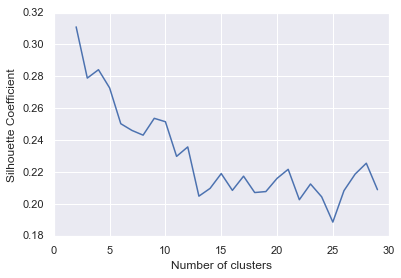

In [64]:
from sklearn.cluster import KMeans
from sklearn import metrics
k_range = range(2, 30)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(hap2017)
    scores.append(metrics.silhouette_score(hap2017, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of neighbors is %d" % optimal_k
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)  

In [107]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans15=KMeans(n_clusters=3, random_state=1).fit(hap2015)

In [108]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans16=KMeans(n_clusters=3, random_state=1).fit(hap2016)

In [109]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans17=KMeans(n_clusters=3, random_state=1).fit(hap2017)

In [110]:
kmeans15.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 2])

In [111]:
kmeans16.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0])

In [112]:
kmeans17.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2])

The Kmeans clustering seemed to closely resemble the Region grouping. 

In [113]:
happiness2015['Kcluster'] = kmeans15.labels_
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster,Kcluster
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,154,153,153,156,0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,88,101,109,130,0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,151,152,152,155,0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,108,121,100,140,0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,157,157,157,157,0


In [115]:
pd.set_option('display.max_rows', None)
pd.pivot_table(happiness2015,index=["Kcluster","Region"])

CCluster  Dystopia Residual  \
Kcluster Region                                                           
0        Australia and New Zealand        132.000000           2.265355   
         Central and Eastern Europe       106.636364           2.453405   
         Eastern Asia                     138.500000           2.271505   
         Latin America and Caribbean      110.421053           2.757781   
         Middle East and Northern Africa  112.125000           2.341744   
         North America                    153.000000           2.480935   
         Southeastern Asia                131.500000           2.102230   
         Western Europe                   123.375000           2.310767   
1        Central and Eastern Europe        78.000000           1.705402   
         Eastern Asia                     106.250000           1.386658   
         Latin America and Caribbean       32.500000           1.528565   
         Middle East and Northern Africa   61.000000           1.540108   
         Southeastern Asia                 68.333333           1.606832   
         Southern Asia                     26.500000           1.154510   
         Sub-Saharan Africa                21.363636           1.402555   
         Western Europe                    78.600000           1.640524   
2        Central and Eastern Europe       103.000000           2.173345   
         Latin America and Caribbean       37.000000           2.241730   
         Middle East and Northern Africa   73.750000           2.136340   
         Southeastern Asia                 50.000000           2.201730   
         Southern Asia                     33.000000           2.361672   
         Sub-Saharan Africa                37.275862           2.254176   

                                          Economy (GDP per Capita)    Family  \
Kcluster Region                                                                
0        Australia and New Zealand                        1.291880  1.314450   
         Central and Eastern Europe                       0.988413  1.108622   
         Eastern Asia                                     1.267795  1.016955   
         Latin America and Caribbean                      0.922764  1.128175   
         Middle East and Northern Africa                  1.262163  1.103004   
         North America                                    1.360400  1.284860   
         Southeastern Asia                                1.244380  1.142520   
         Western Europe                                   1.333309  1.303711   
1        Central and Eastern Europe                       0.974589  1.021038   
         Eastern Asia                                     1.093773  1.140662   
         Latin America and Caribbean                      0.745345  1.062750   
         Middle East and Northern Africa                  1.060136  0.841752   
         Southeastern Asia                                0.663428  0.877818   
         Southern Asia                                    0.802830  1.061500   
         Sub-Saharan Africa                               0.587935  0.941027   
         Western Europe                                   1.187512  1.066794   
2        Central and Eastern Europe                       0.432375  1.003390   
         Latin America and Caribbean                      0.266730  0.743020   
         Middle East and Northern Africa                  0.690270  0.712938   
         Southeastern Asia                                0.632160  0.912260   
         Southern Asia                                    0.463548  0.478850   
         Sub-Saharan Africa                               0.301780  0.759038   

                                           Freedom  Generosity    HCluster  \
Kcluster Region                                                              
0        Australia and New Zealand        0.645310    0.455315  129.500000   
         Central and Eastern Europe       0.357504    0.133613   98.181818   
         E

In [116]:
happiness2015.groupby('Kcluster')[['Happiness Score']].mean()

,Happiness Score
Kcluster,
0,6.500935
1,4.848500
2,4.392595


In [117]:
happiness2015.groupby('Kcluster')[['Happiness Rank']].mean()

,Happiness Rank
Kcluster,
0,33.935484
1,100.351852
2,119.928571


In [119]:
happiness2016['Kcluster'] = kmeans16.labels_
happiness2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster,cluster,Kcluster
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,148,149,149,140,1,1
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,150,148,148,148,1,1
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,110,116,114,118,1,1
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,119,95,146,149,1,1
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,94,113,89,92,1,1


In [120]:
happiness2017['Kcluster'] = kmeans17.labels_
happiness2017.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster,Kcluster
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,152,151,150,149,0
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,143,146,147,140,0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,109,131,128,142,0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,79,130,115,109,0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,116,100,131,107,0


The Economy and Health variables seemed to be the most correlated to Happiness. I will plot my Kmeans groupings by these two variables.
The '0 Cluster' which put the high happiness scores together are at the upper right corner, and the '2 Cluster' which contained most of the lower scoring countries is in the bottom left corner. This is expected.

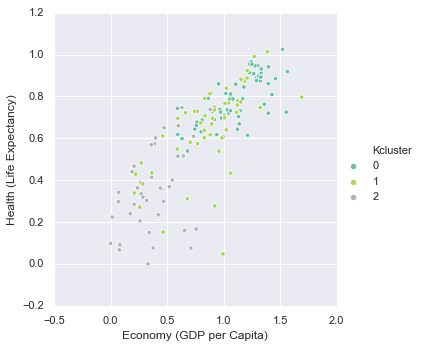

In [121]:
fig15=sns.relplot(x="Economy (GDP per Capita)", y="Health (Life Expectancy)", data=happiness2015, hue="Kcluster", legend='full',palette= 'Set2')

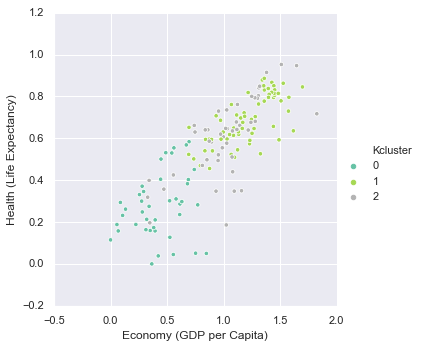

In [122]:
fig16=sns.relplot(x="Economy (GDP per Capita)", y="Health (Life Expectancy)", data=happiness2016, hue="Kcluster", legend='full',  palette='Set2')

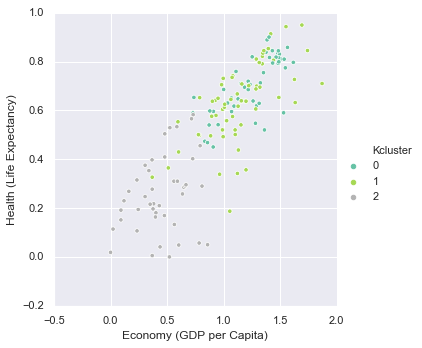

In [123]:
fig17=sns.relplot(x="Economy (GDP per Capita)", y="Health (Life Expectancy)", data=happiness2017, hue="Kcluster", legend='full',palette='Set2')

 ## Questions
 
 
 1) Norway tops the global happiness rankings for all three years 2015, 2016, and 2017
- Although Norway recieved the top happiness ranking in the original data for 2017, it was Switzerland and Denmark in 2015 and 2016 respectively. My hierarchial clustering found Canada to be the top country most consistently. In 2017 Austria made a push for top scoring.


 2) All top ten countries rank highly on all the main features found to support happiness
- Yes, the top ten countries tend to be all around top scoring on all variables. The top ten may not have the top marks but tend to have high marks in all categories


 3) Happiness is both social and personal
- This is definitely true. All factors involved influence happiness both economic, government and family variables. 


 4) Unemployment causes a major fall in happiness, and even for those in work the quality of work can cause major variations in happiness
- Yes, high unemployment causes a happiness to decline. Although even in a good economy, other factors such as government trust, freedom and generosity can matter just as much. 


 5) China are no happier than most countries, though richer and longer longevity
- This seems to be the case. Hong Kong is consistently in the top 10 in Economy and Health, but was only in top 10 happiness in one of my analyses. 
 

 6) Much of Africa is struggling
- Yes, the Sub-Saharan Afraican countries are consistently the bottom 10 in all my analyses for all three years
 

 7) Happiness has fallen in America
- I would disagree with this statement. My analyses ranked the US pretty consistently right on the border of being in and out of the top 10 happiest countries for all three years.

In [127]:
happiness2015.nlargest(10, 'Health (Life Expectancy)')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster,Kcluster
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501,98,119,103,109,0
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429,58,84,99,103,1
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435,111,120,115,124,1
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978,96,127,80,133,0
35,Spain,Western Europe,36,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367,137,126,122,137,0
49,Italy,Western Europe,50,5.948,0.03914,1.25114,1.19777,0.95446,0.26236,0.02901,0.22823,2.02518,84,72,93,114,0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,88,101,109,130,0
28,France,Western Europe,29,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126,138,134,133,58,0
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,154,153,153,156,0
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,104,139,139,111,0


In [130]:
happiness2015.loc[happiness2015['Country']=='United States']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster,Kcluster
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.1589,0.40105,2.51011,95,102,86,149,0


In [131]:
happiness2016.loc[happiness2016['Country']=='United States']

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HCluster,McCluster,MsCluster,CCluster,cluster,Kcluster
12,United States,North America,13,7.104,7.02,7.188,1.50796,1.04782,0.779,0.48163,0.14868,0.41077,2.72782,100,126,88,151,1,1


In [132]:
happiness2017.loc[happiness2017['Country']=='United States']

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HCluster,McCluster,MsCluster,CCluster,Kcluster
13,United States,14,6.993,7.074657,6.911343,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,122,107,106,134,0
